# ME:4111 Scientific Computing and Machine Learning 
# Lecture 22: Supervised machine learning, linear regression
# by Prof. Shaoping Xiao

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### generate dataset

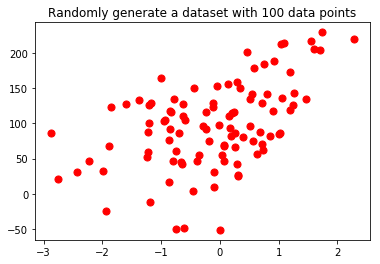

In [3]:
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 100.0,
                            noise = 50, random_state=426)
plt.figure()
plt.scatter(X_R1, y_R1, marker= 'o', c='red', s=50)
plt.title('Randomly generate a dataset with 100 data points')
plt.show()

### training/test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, test_size=0.3, random_state = 0)

### linear regression

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
#The above can be interpret as 1) initialize/configure the regression model; 2) train the model
#linreg = LinearRegression()
#linreg.fit(X_train, y_train)

print('w: {}, b: {}'
     .format(linreg.coef_, linreg.intercept_))
print('R-squared score: {:.3f}(training) and {:.3f}(test) '
     .format(linreg.score(X_train, y_train), linreg.score(X_test, y_test)))

w: [27.99937693], b: 100.57711620865045
R-squared score: 0.235(training) and 0.290(test) 


### Compare test data with Linear regression

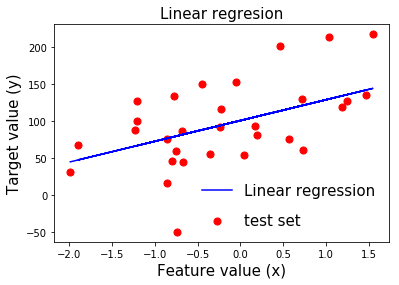

In [6]:
plt.figure()
plt.scatter(X_test, y_test, marker= 'o', c='red', s=50, label='test set')
plt.plot(X_test, linreg.coef_ * X_test + linreg.intercept_, 'b-', label='Linear regression')
plt.legend(scatterpoints=1, fontsize=15, frameon=False, labelspacing=1)
plt.title('Linear regresion', size=15)
plt.xlabel('Feature value (x)', size=15)
plt.ylabel('Target value (y)', size=15)
plt.show()

### adding polynomial features

In [7]:
from sklearn.preprocessing import PolynomialFeatures
ndegree = 3
poly = PolynomialFeatures(degree = ndegree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_test, X_test_poly

(array([[-1.98770247],
        [-0.22777805],
        [ 1.1857578 ],
        [ 0.17413473],
        [-1.22697366],
        [ 0.46599982],
        [ 1.036437  ],
        [-0.04832031],
        [ 0.72953703],
        [-0.86339475],
        [ 0.03753577],
        [-0.74563497],
        [-0.68721853],
        [-0.78147901],
        [-1.20379778],
        [-0.23558029],
        [ 1.46512371],
        [ 0.72021191],
        [-0.85805425],
        [ 0.56419876],
        [ 1.54858407],
        [-0.35723576],
        [-0.44746489],
        [-0.79358893],
        [-1.89294738],
        [-1.20621668],
        [-0.66919152],
        [ 0.18907968],
        [-0.7524239 ],
        [ 1.24381439]]),
 array([[ 1.00000000e+00, -1.98770247e+00,  3.95096111e+00,
         -7.85333517e+00],
        [ 1.00000000e+00, -2.27778050e-01,  5.18828401e-02,
         -1.18177722e-02],
        [ 1.00000000e+00,  1.18575780e+00,  1.40602155e+00,
          1.66720102e+00],
        [ 1.00000000e+00,  1.74134733e-01,  3.0

### linear regression for polynomial

In [8]:
linreg_poly = LinearRegression().fit(X_train_poly, y_train)
print('w: {}, b: {}'
     .format(linreg_poly.coef_, linreg_poly.intercept_))
print('R-squared score: {:.3f}(training) and {:.3f}(test) '
     .format(linreg_poly.score(X_train_poly, y_train), linreg_poly.score(X_test_poly, y_test)))

w: [ 0.         23.06971301 15.84293869  4.38106939], b: 86.07035120919542
R-squared score: 0.342(training) and 0.310(test) 


### plot

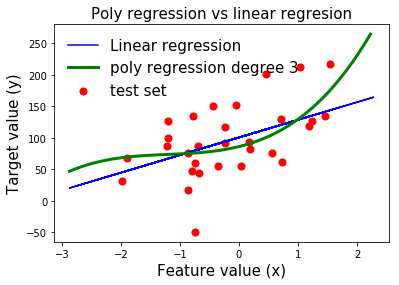

In [9]:
X_plot=np.arange(X_train.min(), X_train.max(), 0.1)
X_plot.shape=(X_plot.size,1)
X_plot_poly = poly.fit_transform(X_plot)
y_plot=linreg_poly.predict(X_plot_poly)

plt.figure()
plt.scatter(X_test, y_test, marker= 'o', c='red', s=50, label='test set')
plt.plot(X_train, linreg.coef_ * X_train + linreg.intercept_, 'b-', label='Linear regression')
plt.plot(X_plot, y_plot, 'g-', label='poly regression degree {}'.format(ndegree), linewidth =3)

plt.legend(scatterpoints=1, fontsize=15, frameon=False, labelspacing=0.5)
plt.title('Poly regression vs linear regresion', size=15)
plt.xlabel('Feature value (x)', size=15)
plt.ylabel('Target value (y)', size=15)
plt.show()